In [20]:
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb

In [21]:
from venv import create
import csv
import pandas as pd
import os
import time
import numpy as np

In [22]:
import mysql.connector
import pandas as pd
df = pd.read_csv('/Users/sonalibandi/Documents/DMDD/crashes_final.csv', index_col=False, delimiter = ',' )



In [23]:
df

,Name,Distance,PedestrianAction,PrimaryCollisionFactor,CollisionType,ProximityToIntersection,VehicleInvolvedWith
0,CR-0000089828,800,No Pedestrians Involved,Violation Driver 1,Hit Object,Non-Related,Fixed Object
1,CR-0000089850,0,Crossing - Not In Crosswalk,Violation Driver 1,Vehicle/Pedestrian,Intersection,Pedestrian
2,CR-0000090339,0,Crossing In Crosswalk - At Intersection,Violation Driver 1,Vehicle/Pedestrian,Intersection,Pedestrian
3,CR-0000090341,0,No Pedestrians Involved,Violation Driver 1,Hit Object,Intersection,Fixed Object
4,CR-0000090540,57,No Pedestrians Involved,Violation Driver 1,Sideswipe,Non-Related,Parked Vehicle
...,...,...,...,...,...,...,...
46652,CR-0000049048,29,No Pedestrians Involved,Violation Driver 1,Other,Non-Related,Fixed Object
46653,CR-0000049690,109,No Pedestrians Involved,Violation Driver 1,Other,Non-Related,Fixed Object
46654,CR-0000049601,201,No Pedestrians Involved,Violation Driver 1,Other,Non-Related,Fixed Object
46655,CR-0000085886,24,Crossing In Crosswalk - At Intersection,Violation Driver 1,Vehicle/Pedestrian,Related,Pedestrian


In [24]:
df.describe()

,Distance
count,46657.000000
mean,95.040766
std,244.174715
min,0.000000
25%,0.000000
50%,15.000000
75%,108.000000
max,8448.000000


In [25]:
df.count()

Name                       46657
Distance                   46657
PedestrianAction           46657
PrimaryCollisionFactor     46657
CollisionType              46657
ProximityToIntersection    46657
VehicleInvolvedWith        46657
dtype: int64

In [26]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

No NAs found


<AxesSubplot:>

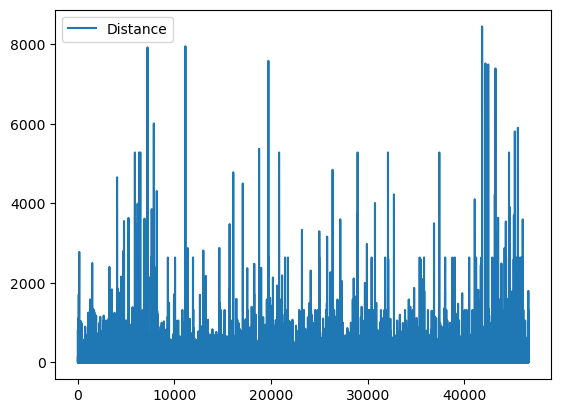

In [27]:
df.plot()

<AxesSubplot:xlabel='CollisionType'>

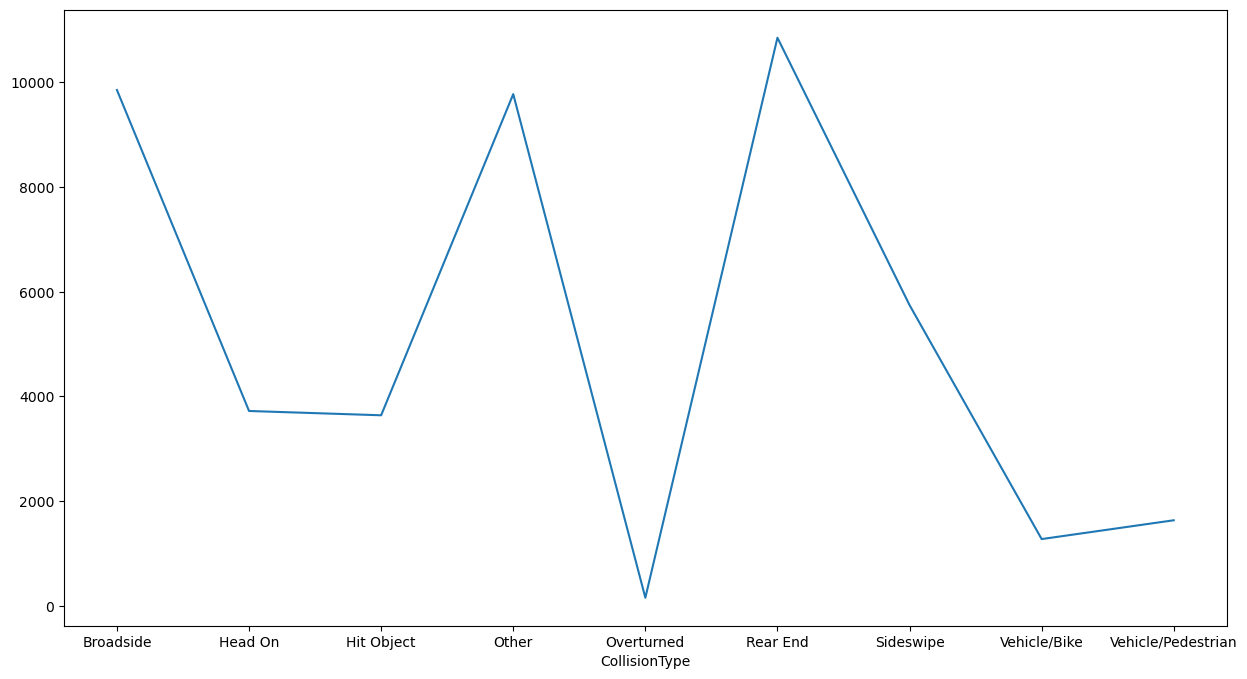

In [28]:
df.groupby('CollisionType').count()['Distance'].plot(figsize = (15,8))

<AxesSubplot:xlabel='PrimaryCollisionFactor'>

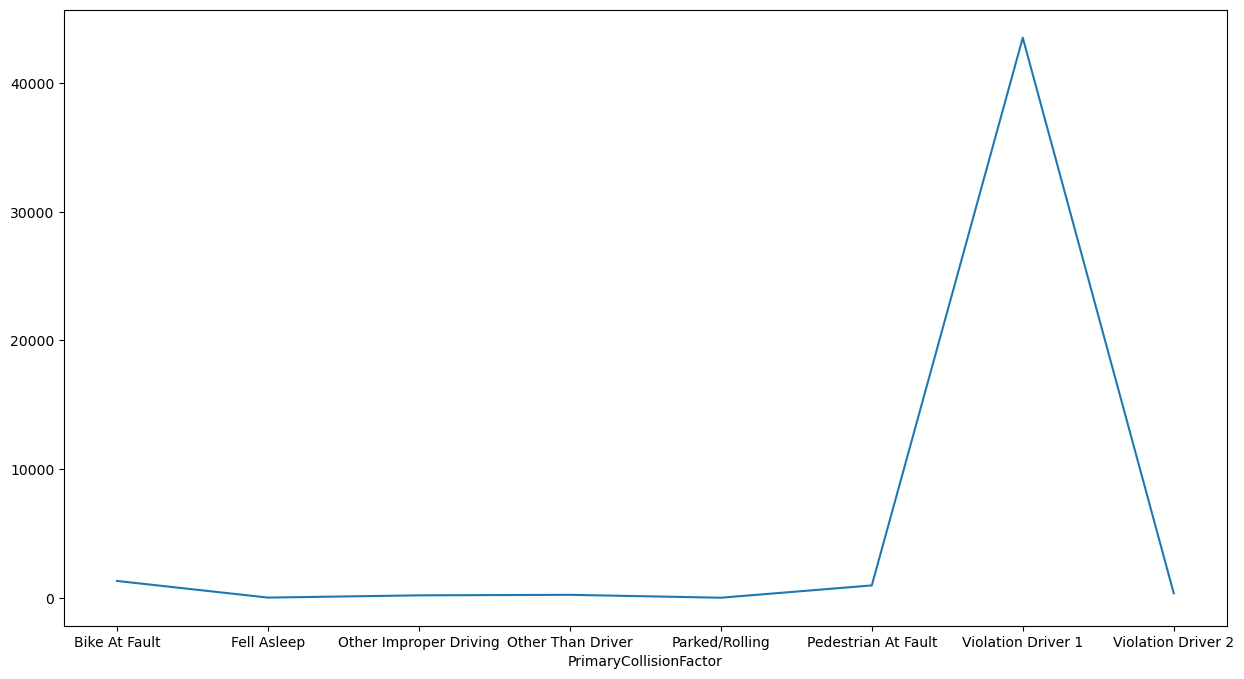

In [29]:
df.groupby('PrimaryCollisionFactor')['PrimaryCollisionFactor'].count().plot(figsize = (15,8))

In [30]:
ohe = pd.get_dummies(df)